In [2]:
import numpy as np 
import pandas as pd  
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### 1. ¿Qué es la Diabetes?
La diabetes es una enfermedad crónica que ocurre cuando el páncreas deja de producir insulina o cuando el cuerpo no puede utilizar adecuadamente la insulina que genera. La insulina es una hormona esencial que permite que la glucosa en la sangre entre en las células para ser utilizada como energía. Si no se controla, la diabetes puede provocar complicaciones graves, como enfermedades cardíacas, daño renal, problemas de visión y neuropatías.

El uso de técnicas de `Machine Learning` nos permite analizar patrones en los datos médicos para predecir la probabilidad de que una persona tenga diabetes. En este proyecto, aplicaremos modelos de aprendizaje automático para clasificar a los pacientes en dos categorías: aquellos con diabetes y aquellos sin la enfermedad.

El conjunto de datos utilizado contiene las siguientes variables independientes (características médicas) y una variable dependiente (resultado):

**Variables independientes:**

- `Pregnancies:` Número de veces que la mujer ha estado embarazada.
- `Glucose:` Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral.
- `BloodPressure:` Presión arterial diastólica (mm Hg).
- `SkinThickness:` Grosor del pliegue cutáneo del tríceps (mm).
- `Insulin:` Nivel de insulina en suero a las 2 horas (mu U/ml).
- `BMI:` Índice de Masa Corporal (peso en kg/altura en m²).
- `DiabetesPedigreeFunction:` Puntaje que indica la probabilidad de diabetes basada en antecedentes familiares.
- `Age:` Edad (años).

**Variable dependiente:**
- `Outcome:` Indica si la persona tiene diabetes (1) o no (0).

In [ ]:
df=pd.read_csv("/Users/alejandraossayepes/Library/CloudStorage/OneDrive-MIC/00_Maestria/14 Proyecto_1/Modulo_3/proyecto-prediccion-diabtes/proyecto-prediccion-diabtes/data/raw/diabetes.csv")

In [4]:
df.shape

(768, 9)

In [5]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Data Cleaning
La limpieza de datos es un paso fundamental en cualquier análisis o modelo de Machine Learning, ya que garantiza la calidad y precisión de los resultados. Los datos suelen contener valores nulos, duplicados, errores tipográficos o inconsistencias que pueden afectar la interpretación y el rendimiento de los modelos.

In [8]:
df=df.drop_duplicates()

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
print(f'Cantidad de registros cero de BloodPressure: ', df[df['BloodPressure']==0].shape[0])
print(f'Cantidad de registros cero de Glucose:', df[df['Glucose']==0].shape[0])
print(f'Cantidad de registros cero de SkinThickness:', df[df['SkinThickness']==0].shape[0])
print(f'Cantidad de registros cero de Insulin:',df[df['Insulin']==0].shape[0])
print(f'Cantidad de registros cero de BMI:', df[df['BMI']==0].shape[0])

Cantidad de registros cero de BloodPressure:  35
Cantidad de registros cero de Glucose: 5
Cantidad de registros cero de SkinThickness: 227
Cantidad de registros cero de Insulin: 374
Cantidad de registros cero de BMI: 11


Debido a que hay una variables en mi data set con valores ceros que son poco razonables se hara un remplazo de estos

Algunas de las columnas tienen una distribución sesgada, por lo que la media se ve más afectada por los valores atípicos que la mediana. La glucosa y la presión arterial tienen distribuciones normales, por lo que reemplazamos los valores 0 en esas columnas por el valor medio. El grosor de la piel, la insulina y el IMC tienen distribuciones sesgadas, por lo que la mediana es una mejor opción, ya que se ve menos afectada por los valores atípicos.

In [11]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

#### Distribución de las variables

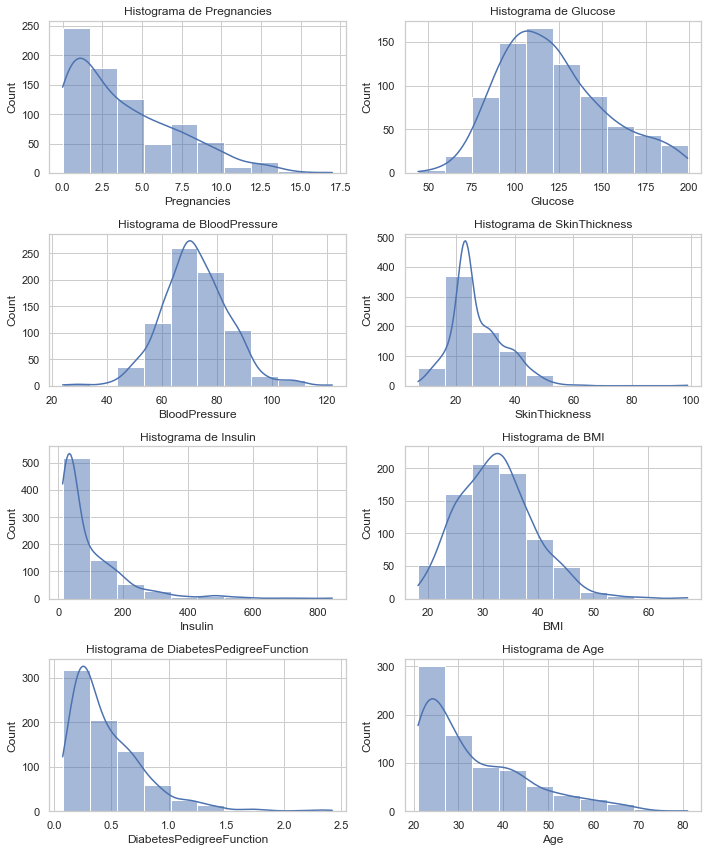

In [12]:
dfh = df.drop(df.columns[-1], axis=1)
sns.set(style="whitegrid")
num_rows = (len(dfh.columns) + 2 - 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 3 * num_rows))
for i, column in enumerate(dfh.columns):
    row = i // 2
    col = i % 2
    sns.histplot(dfh[column], bins=10, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histograma de {column}')
for j in range(i + 1, num_rows * 2):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

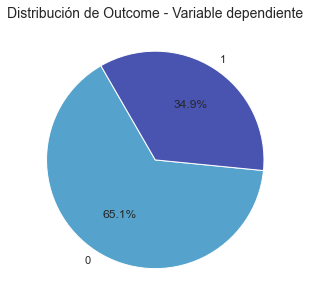

In [13]:
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(outcome_counts, labels=outcome_counts.index,
         autopct='%1.1f%%', startangle=120,
           colors=sns.color_palette("icefire"))
plt.title('Distribución de Outcome - Variable dependiente',fontsize=14)
plt.show()

- La categoría 0 representa aproximadamente el 65.1% de los datos.
- La categoría 1 representa aproximadamente el 34.9% de los datos. <br>
 Hay una proporción significativamente menor de casos con `Diabetes` en comparación con la categoría `Sin Diabetes`

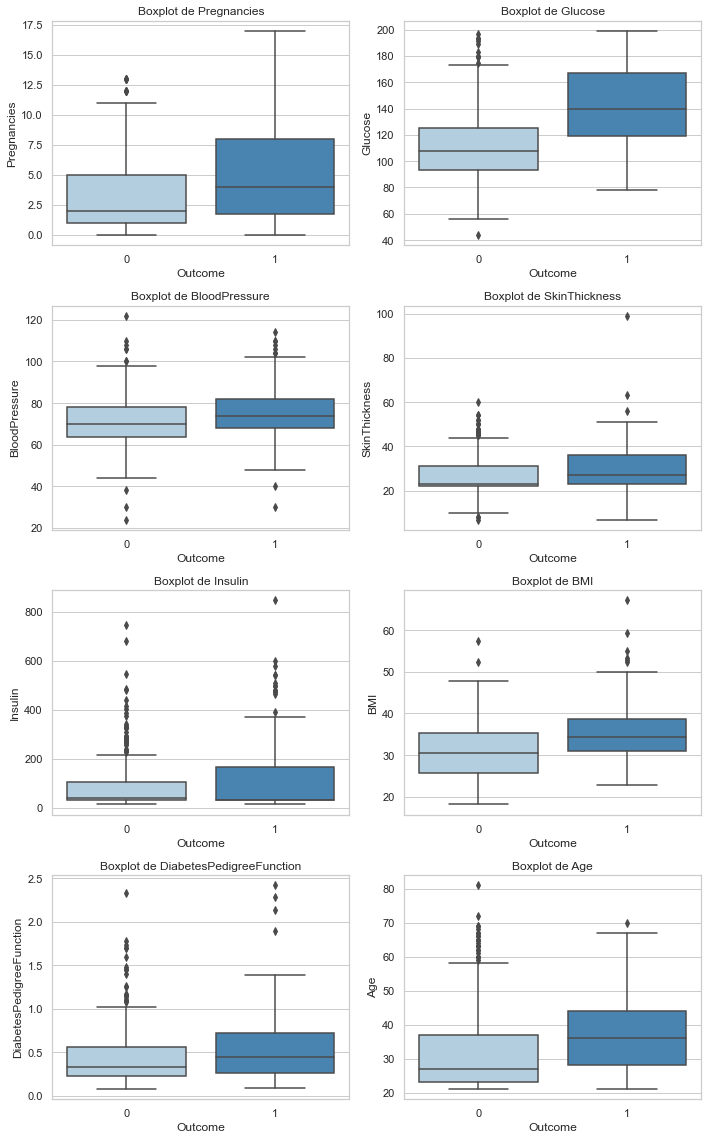

In [14]:
dfh = df.drop(df.columns[-1], axis=1)
sns.set(style="whitegrid")
num_rows = (len(dfh.columns) + 2 - 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4 * num_rows))

for i, column in enumerate(dfh.columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Outcome', y=column, data=df, ax=axes[row, col], palette="Blues")
    axes[row, col].set_title(f'Boxplot de {column}')

for j in range(i + 1, num_rows * 2):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

Los valores atípicos, o puntos de datos inusuales, pueden distorsionar significativamente los análisis estadísticos e invalidar sus suposiciones subyacentes. Dado que la eliminación de estos valores atípicos conlleva el riesgo de una pérdida sustancial de datos, exploraremos varias técnicas de escalamiento y transformación para mitigar su impacto.

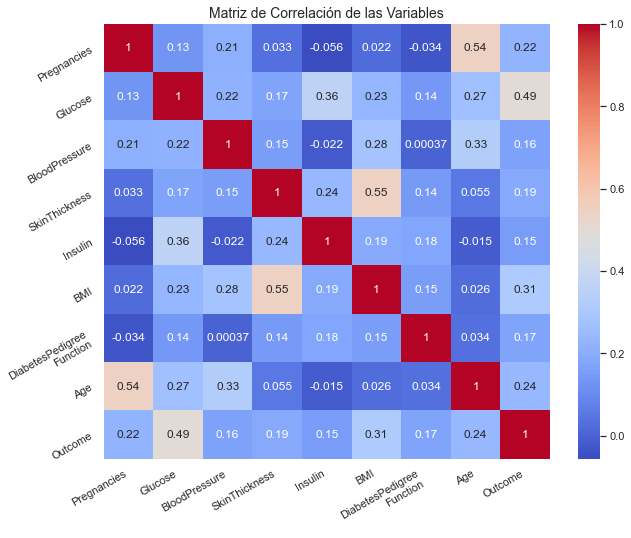

In [16]:
correlation_matrix = df.corr()

new_labels = [label.replace(' ', '\n') for label in correlation_matrix.columns]
new_labels = ['DiabetesPedigree\nFunction' if label == 'DiabetesPedigreeFunction' else label for label in new_labels]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',xticklabels=new_labels, yticklabels=new_labels)
plt.title('Matriz de Correlación de las Variables', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=30, ha='right')
plt.show()

La matriz de correlación muestra la relación lineal entre pares de variables: `|r| ≥ 0.5: Correlación fuerte`

#### Análisis de Componentes Principales (PCA)
El PCA es una técnica de reducción de dimensionalidad que te ayuda a identificar combinaciones lineales de variables que explican la mayor parte de la varianza en los datos. Esto puede revelar patrones ocultos y relaciones entre las variables y la diabetes.

Varianza explicada por el primer componente principal: 0.27
Varianza explicada por el segundo componente principal: 0.21


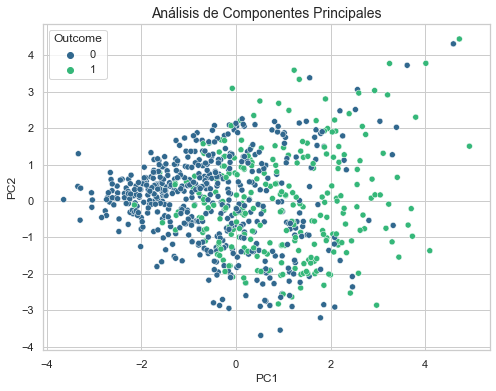

In [17]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el primer componente principal: {explained_variance[0]:.2f}')
print(f'Varianza explicada por el segundo componente principal: {explained_variance[1]:.2f}')


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=pca_df, palette='viridis')
plt.title('Análisis de Componentes Principales', fontsize=14)
plt.show()

En la matriz de correlación, observamos que las variables `Glucose`, `Pregnancies`, `SkinThickness`, `BMI` y `Age` presentan las correlaciones más fuertes con el resultado, indicando una relación significativa con la presencia de diabetes. Por otro lado, variables como la `BloodPressure`, `Insulin` y la `DiabetesPedigreeFunction` de la diabetes muestran correlaciones más débiles, sugiriendo una menor contribución al modelo predictivo. Por lo tanto, podríamos considerar la posibilidad de excluir estas últimas variables para simplificar el modelo sin comprometer su eficacia.

In [20]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [19]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0
